In this notebook we will see our we can filter our original sound wave from a noisy wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def draw(x_axis, y_axis, label, color, x_label, y_label, title,lw):
    plt.figure(figsize=(15, 5))
    plt.grid(alpha=0.3)
    plt.style.use('dark_background')
    plt.plot(x_axis, y_axis, label=label, color=color,linewidth=lw)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(loc='upper right')
    plt.show()
    return

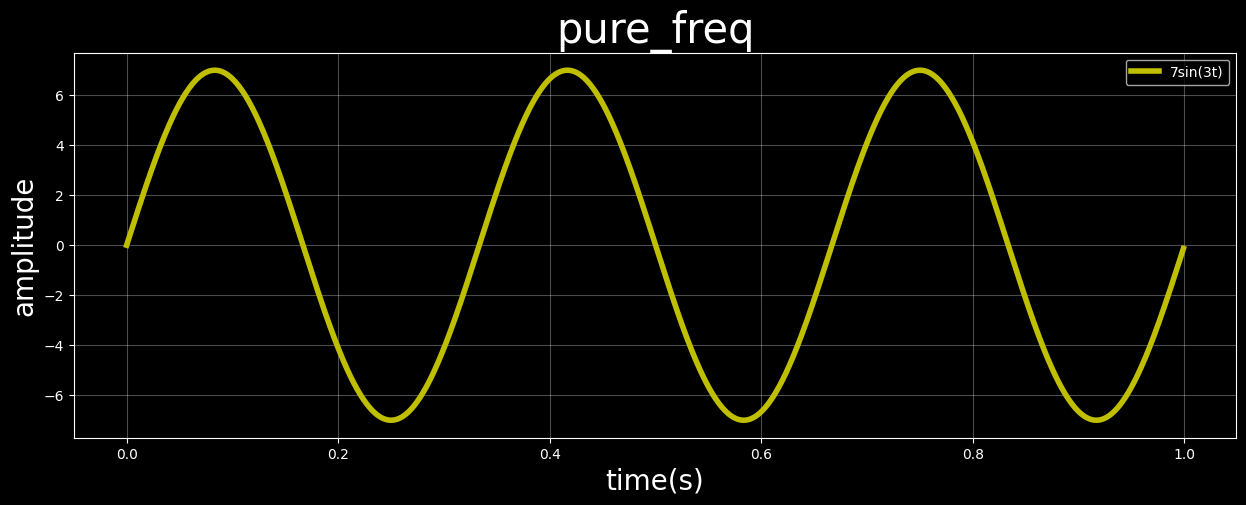

In [13]:
dt = 0.001
t = np.arange(0,1,dt)
sin_3t = 7*np.sin(2*np.pi*3*t) 
# 7sin(3t): sin signal with frequency of 3Hz
draw(t,sin_3t,'7sin(3t)','y','time(s)','amplitude','pure_freq',4)

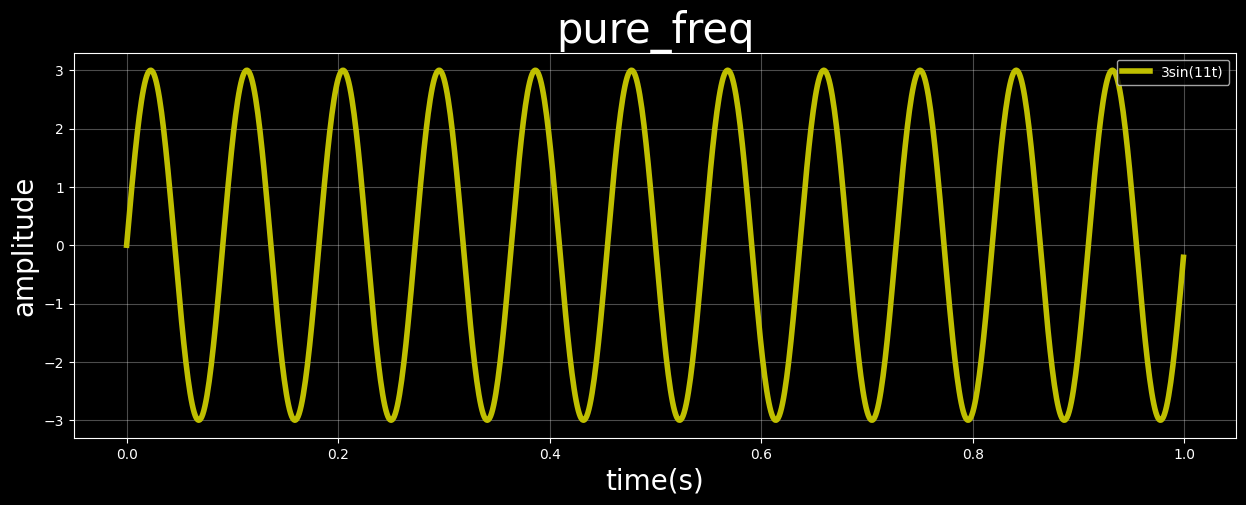

In [4]:
sin_11t = 3*np.sin(2*np.pi*11*t)
draw(t,sin_11t,'3sin(11t)','y','time(s)','amplitude','pure_freq',4)

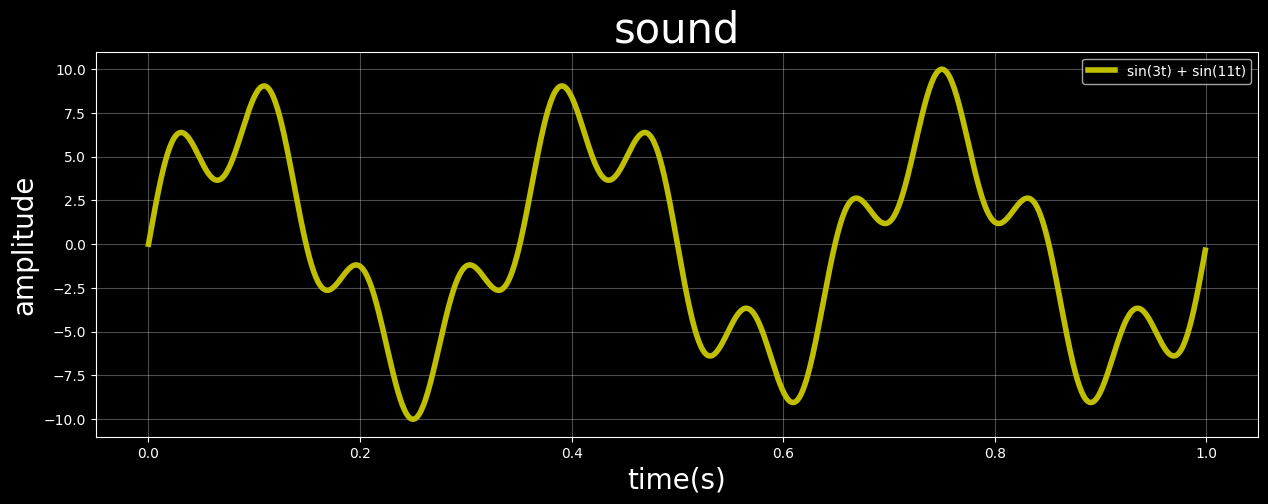

In [5]:
sum = sin_3t + sin_11t
draw(t,sum,'sin(3t) + sin(11t)','y','time(s)','amplitude','sound',4)

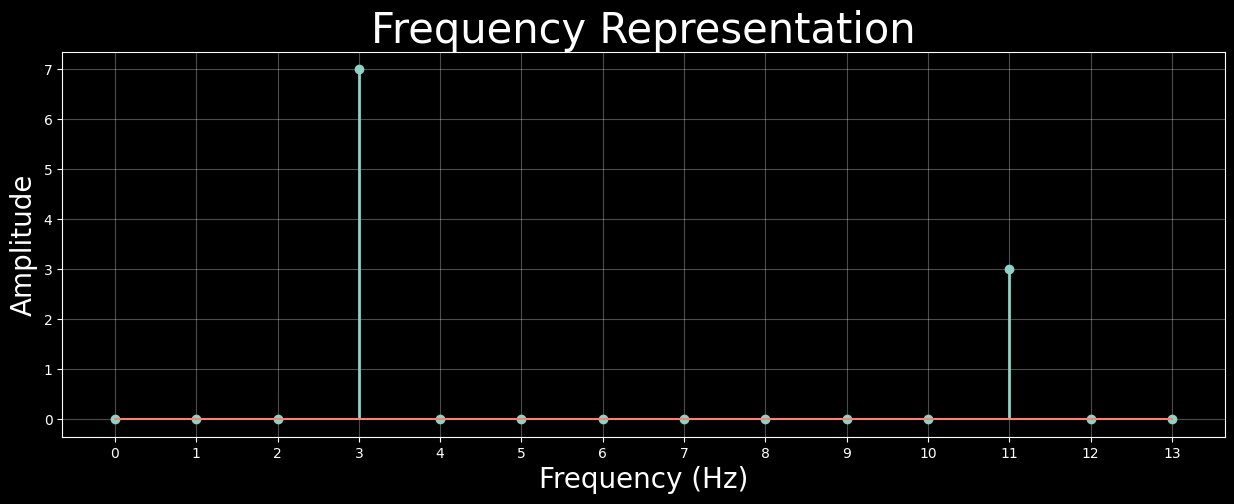

In [6]:
ft = np.fft.fft(sum)/len(sum)
tpCount = len(sum)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/1000
frequencies = values/timePeriod
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency Representation', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
markerline, stemlines, baseline = plt.stem(frequencies[0:14], 2*np.abs(ft[0:14]),label='sound')
plt.setp(stemlines, 'linewidth', 2)
plt.show()

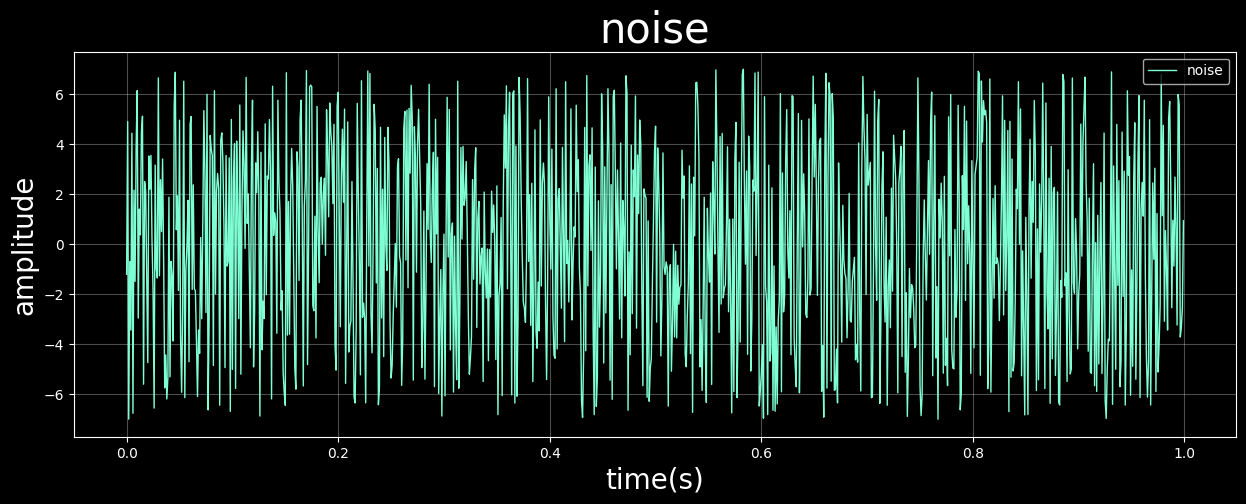

In [7]:
noise = 14*np.random.sample(len(t))-7
draw(t,noise,'noise','aquamarine','time(s)','amplitude','noise',1)

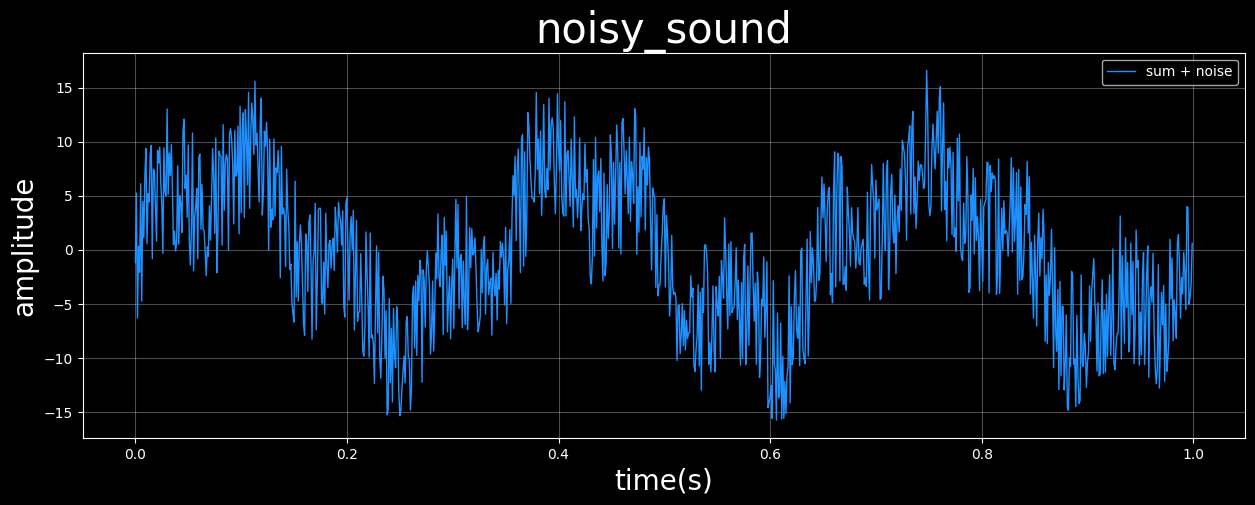

In [8]:
noisy = sum + noise
draw(t,noisy,'sum + noise','dodgerblue','time(s)','amplitude','noisy_sound',1)

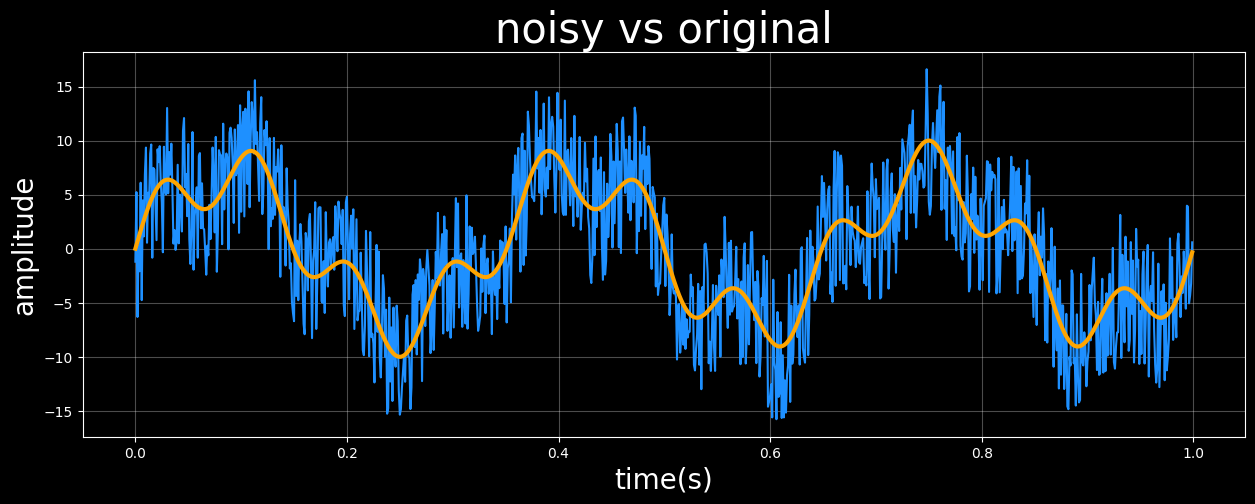

In [9]:
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.style.use('dark_background')
plt.plot(t,noisy,'dodgerblue')
plt.plot(t,sum,'orange',linewidth=3)
plt.xlabel('time(s)', fontsize=20)
plt.ylabel('amplitude', fontsize=20)
plt.title('noisy vs original', fontsize=30)
plt.show()

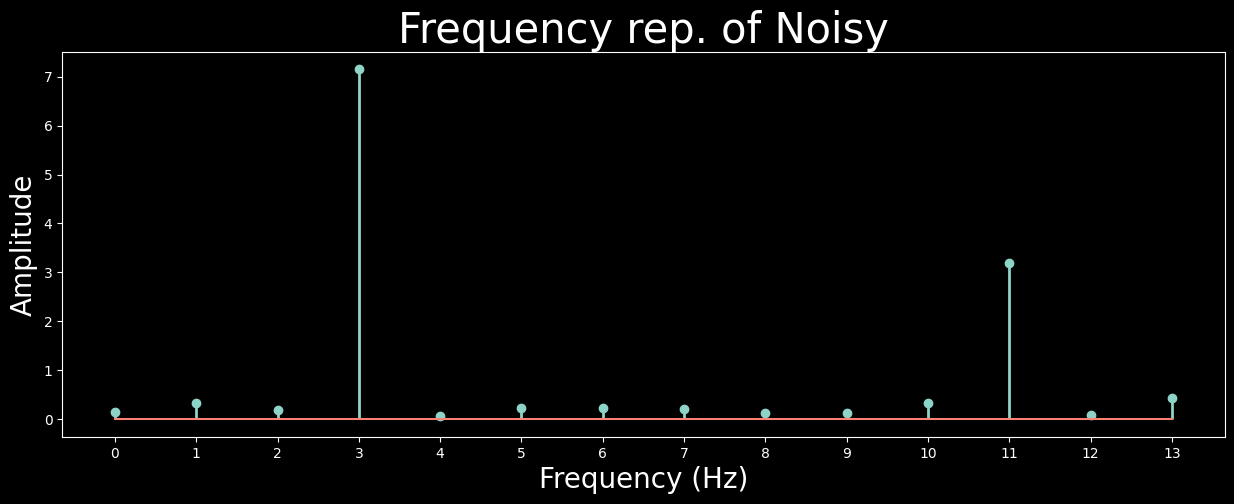

In [10]:
ft = np.fft.fft(noisy)/len(noisy)
tpCount = len(noisy)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/1000
frequencies = values/timePeriod
psd = 2*np.abs(ft)
plt.figure(figsize=(15, 5))
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency rep. of Noisy', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
markerline, stemlines, baseline = plt.stem(frequencies[0:14], psd[0:14])
plt.setp(stemlines, 'linewidth', 2)
plt.show()

In [11]:
indices = [psd > 2]
filt_ft = ft*indices

inve_ft = np.fft.ifft(filt_ft)

c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


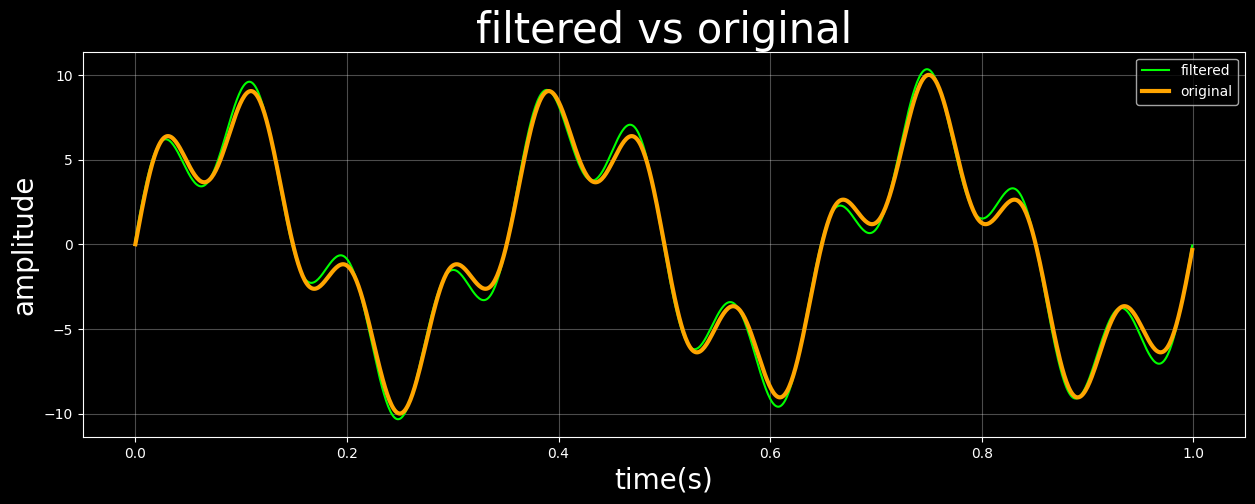

In [14]:
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.style.use('dark_background')
plt.plot(t,1000*inve_ft.reshape((1000,)),'lime')
plt.plot(t,sum,'orange',linewidth=3)
plt.xlabel('time(s)', fontsize=20)
plt.ylabel('amplitude', fontsize=20)
plt.legend(['filtered','original'], loc='upper right')
plt.title('filtered vs original', fontsize=30)
plt.show()